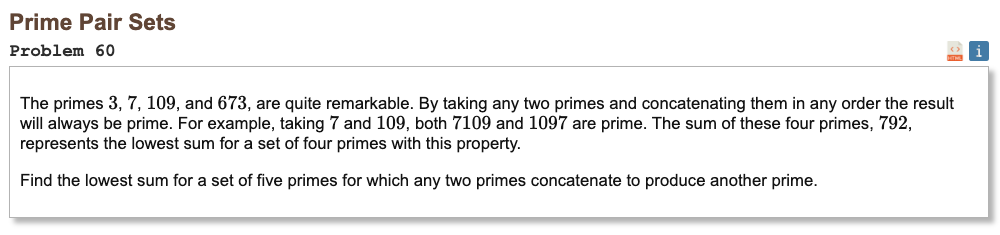

## Initial approach

Looking for 5 prime numbers with following properties:

If you put any two of them side by side, new number must a prime

In [1]:
from itertools import combinations
from math import isqrt

In [2]:
def is_prime(n):
    if n < 2:
        return False
    if n == 2:
        return True
    if n % 2 == 0:
        return False
    for i in range(3, isqrt(n) + 1, 2):
        if n % i == 0:
            return False
    return True


def are_concat_primes(a, b, cache):
    if (a, b) in cache:
        return cache[(a, b)]
    sa = str(a)
    sb = str(b)
    ab = int(sa + sb)
    ba = int(sb + sa)
    result = is_prime(ab) and is_prime(ba)
    cache[(a, b)] = result
    cache[(b, a)] = result
    return result


def search(primes, path, cache):
    if len(path) == 5:
        return path
    for p in primes:
        if p > path[-1]:
            if all(are_concat_primes(p, q, cache) for q in path):
                result = search(primes, path + [p], cache)
                if result:
                    return result
    return None

In [3]:
%%time

prime_list = [2]
while prime_list[-1] < 10000:
    candidate = prime_list[-1] + 1
    while not is_prime(candidate):
        candidate += 1
    prime_list.append(candidate)

cache = dict()
for a in prime_list:
    result = search(prime_list, [a], cache)
    if result:
        print("Result:",sum(result))
        break

Result: 26033
CPU times: user 767 ms, sys: 10.9 ms, total: 778 ms
Wall time: 786 ms
